# Challenge: What test to use

In [1]:
# MENTOR QUESTIONS
# Non-normal distrib, 2 indep. groups tests:
# Mann-Whitney U

# Non-normal distrib, 2+ indep. groups tests:
# Mood's Median, Kruskal-Wallis

# Non-normal distrib, 2 dep. groups tests:
# Wilcoxon

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_ind, f_oneway, mannwhitneyu, median_test, kruskal, normaltest

df = pd.read_csv('./data/ess.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


For each question, explain why you chose the approach you did. In this dataset, the same participants answered questions in 2012 and again 2014.

- __Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

    The countries' trust levels data are dependent samples, as the same group of test subjects answered the same question twice during 2 different years (2012, 2014).
    
    I conducted a T-test for paired samples for only DE, as its reported trust levels had normal distributions. All other countries had non-normal distributions, so I used 3 different non-parametric tests (Mann-Whitney, Mood's Median, and Kruskal-Wallis) to compare 2012 vs. 2014.

    Only ES and SE had p-values less than 5%, which means it is unlikely that people from any other country became less trusting from 2012 to 2014. It is likely that ES citizens became less trusting, while SE citizens became more.

* CH 2012 vs. 2014
    mann-whitney stat: 294004.5 / pval: 0.29
    mood's median stat: 0.07 / pval: 0.8
    kruskal stat: 0.3 / pval: 0.58
* CZ 2012 vs. 2014
    mann-whitney stat: 212706.0 / pval: 0.29
    mood's median stat: 3.76 / pval: 0.05
    kruskal stat: 0.72 / pval: 0.4
* DE 2012 vs. 2014 T-Test – stat: -0.18 / p-val: 0.86
* DE 2012 vs. 2014
    mann-whitney stat: 94.0 / pval: 0.44
    mood's median stat: 0.6 / pval: 0.44
    kruskal stat: 0.03 / pval: 0.85


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


* ES 2012 vs. 2014
    mann-whitney stat: 688126.0 / pval: 0.0
    mood's median stat: 5.53 / pval: 0.02
    kruskal stat: 8.22 / pval: 0.0
* NO 2012 vs. 2014
    mann-whitney stat: 263282.0 / pval: 0.31
    mood's median stat: 0.05 / pval: 0.83
    kruskal stat: 0.24 / pval: 0.62
* SE 2012 vs. 2014
    mann-whitney stat: 390521.0 / pval: 0.02
    mood's median stat: 4.0 / pval: 0.05
    kruskal stat: 4.24 / pval: 0.04


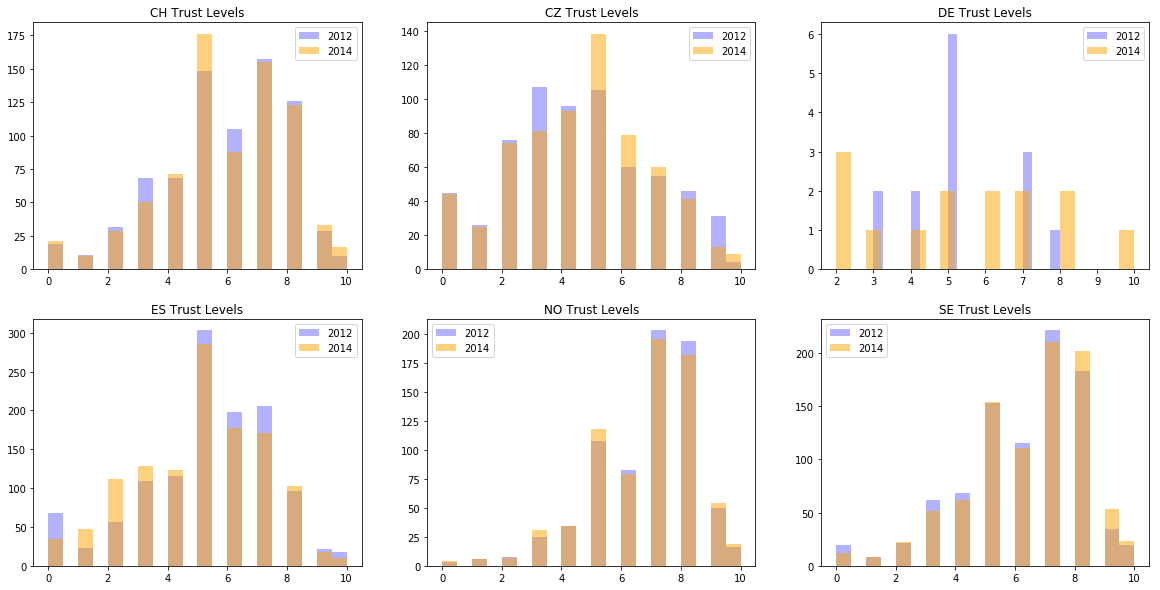

In [10]:
plt.figure(figsize=(20,10))

def is_normally_distributed(alpha):
    return alpha > 0.05

for idx, cntry in enumerate(df['cntry'].unique()):
    yr_12_trust = df.query('year == 6 and cntry == "' + cntry + '"')['ppltrst']
    yr_14_trust = df.query('year == 7 and cntry == "' + cntry + '"')['ppltrst']
    
    norm_12_res = normaltest(yr_12_trust, nan_policy='omit')
    norm_14_res = normaltest(yr_14_trust, nan_policy='omit')
    
    if is_normally_distributed(norm_12_res.pvalue) and is_normally_distributed(norm_14_res.pvalue):
        ttest_res = ttest_rel(yr_12_trust, yr_14_trust, nan_policy='omit')
        print('*', cntry, '2012 vs. 2014 T-Test – stat:', round(ttest_res.statistic, 2), '/ p-val:', round(ttest_res.pvalue, 2))
    else:
        print('*', cntry, '2012 vs. 2014')
        for name, test in {'mann-whitney': mannwhitneyu, "mood's median": median_test, 'kruskal': kruskal}.items():
            if hasattr(test(yr_12_trust, yr_14_trust), 'pvalue'):
                if name == 'kruskal':
                    test_res = test(yr_12_trust, yr_14_trust, nan_policy='omit')
                else:
                    test_res = test(yr_12_trust, yr_14_trust)
                print('   ', name, 'stat:', round(test_res.statistic, 2), '/ pval:', round(test_res.pvalue, 2))
            else:
                test_res = test(yr_12_trust, yr_14_trust, nan_policy='omit')
                print('   ', name, 'stat:', round(test_res[0], 2), '/ pval:', round(test_res[1], 2))
    plt.subplot(2, 3, idx + 1)
    plt.hist(yr_12_trust.dropna(), bins=20, alpha=0.3, color='blue', label='2012')
    plt.hist(yr_14_trust.dropna(), bins=20, alpha=0.5, color='orange', label='2014')
    plt.legend()
    plt.title(cntry + ' Trust Levels')

plt.show()

- __Did people become happier from 2012 to 2014? Compute results for each country in the sample.__

    The countries' happiness levels data are dependent samples, as the same group of test subjects answered the same question twice during 2 different years (2012, 2014).

    Again, I conducted a T-test for paired samples for only DE, as its reported happiness levels had normal distributions. All other countries had non-normal distributions, so I used 3 different non-parametric tests (Mann-Whitney, Mood's Median, and Kruskal-Wallis) to compare 2012 vs. 2014.
    
    It seemed that most countries did not become noticeably happier from 2012 to 2014. Only ES and NO did show a significant difference in happiness between the 2 years (happier in 2012 than 2014).

* CH 2012 vs. 2014
    mann-whitney stat: 295920.5 / pval: 0.37
    mood's median stat: 1.05 / pval: 0.31
    kruskal stat: 0.22 / pval: 0.64
* CZ 2012 vs. 2014
    mann-whitney stat: 210494.0 / pval: 0.19
    mood's median stat: 3.96 / pval: 0.05
    kruskal stat: 1.43 / pval: 0.23
* DE 2012 vs. 2014 T-Test – stat: -0.81 / p-val: 0.43
* ES 2012 vs. 2014
    mann-whitney stat: 701480.5 / pval: 0.02
    mood's median stat: 4.79 / pval: 0.03
    kruskal stat: 4.09 / pval: 0.04


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


* NO 2012 vs. 2014
    mann-whitney stat: 231619.5 / pval: 0.0
    mood's median stat: 9.06 / pval: 0.0
    kruskal stat: 19.14 / pval: 0.0
* SE 2012 vs. 2014
    mann-whitney stat: 408890.5 / pval: 0.38
    mood's median stat: 0.0 / pval: 0.95
    kruskal stat: 0.05 / pval: 0.82


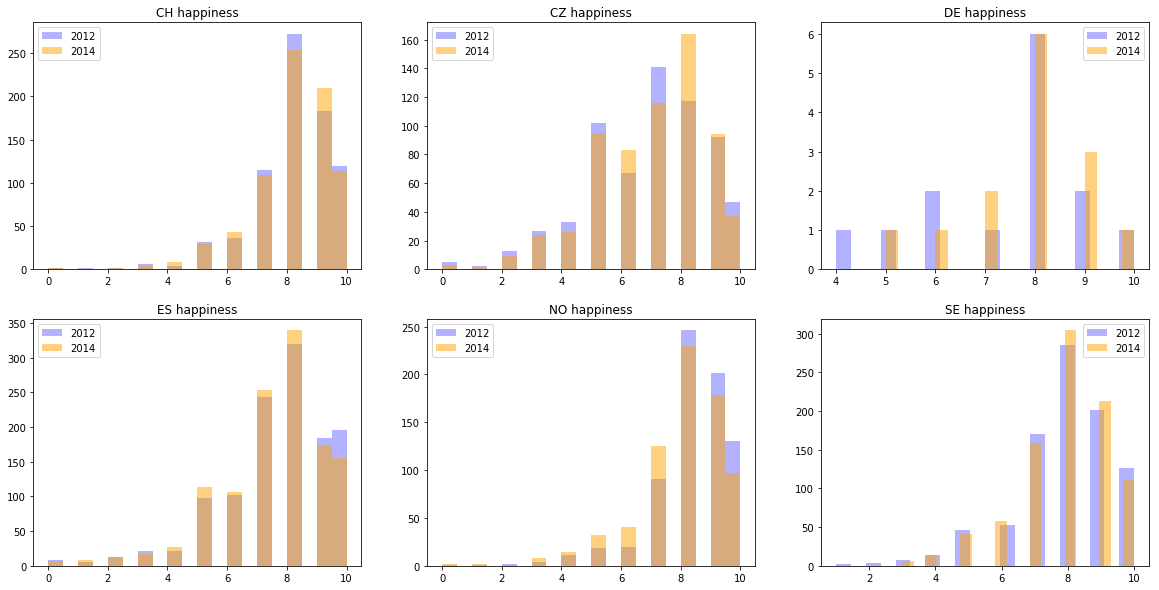

In [77]:
plt.figure(figsize=(20, 10))

for idx, cntry in enumerate(df['cntry'].unique()):
    yr_12_happy = df.query('year == 6 and cntry == "' + cntry + '"')['happy']
    yr_14_happy = df.query('year == 7 and cntry == "' + cntry + '"')['happy']
    
    norm_12_res = normaltest(yr_12_happy, nan_policy='omit')
    norm_14_res = normaltest(yr_14_happy, nan_policy='omit')
    
    if is_normally_distributed(norm_12_res.pvalue) and is_normally_distributed(norm_14_res.pvalue):
        ttest_res = ttest_rel(yr_12_happy, yr_14_happy, nan_policy='omit')
        print('*', cntry, '2012 vs. 2014 T-Test – stat:', round(ttest_res.statistic, 2), '/ p-val:', round(ttest_res.pvalue, 2))
    else:
        print('*', cntry, '2012 vs. 2014')
        for name, test in {'mann-whitney': mannwhitneyu, "mood's median": median_test, 'kruskal': kruskal}.items():
            if hasattr(test(yr_12_happy, yr_14_happy), 'pvalue'):
                if name == 'kruskal':
                    test_res = test(yr_12_happy, yr_14_happy, nan_policy='omit')
                else:
                    test_res = test(yr_12_happy, yr_14_happy)
                print('   ', name, 'stat:', round(test_res.statistic, 2), '/ pval:', round(test_res.pvalue, 2))
            else:
                test_res = test(yr_12_happy, yr_14_happy, nan_policy='omit')
                print('   ', name, 'stat:', round(test_res[0], 2), '/ pval:', round(test_res[1], 2))
    
    plt.subplot(2, 3, idx + 1)
    plt.hist(yr_12_happy.dropna(), bins=20, alpha=0.3, color='blue', label="2012")
    plt.hist(yr_14_happy.dropna(), bins=20, alpha=0.5, color='orange', label="2014")
    plt.legend()
    plt.title(cntry + ' happiness')
    
    ttest_res = ttest_rel(yr_12_happy, yr_14_happy, nan_policy='omit')

- __Who reported watching more TV in 2012, men or women?__

    I used 3 different non-parametric tests (Mann-Whitney, Mood's Median, and Kruskal-Wallis) for this comparison, as men and women do not overlap (i.e. independent samples), but their TV consumption is not normally distributed. There is no significant difference in the number of hours watched by either gender.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


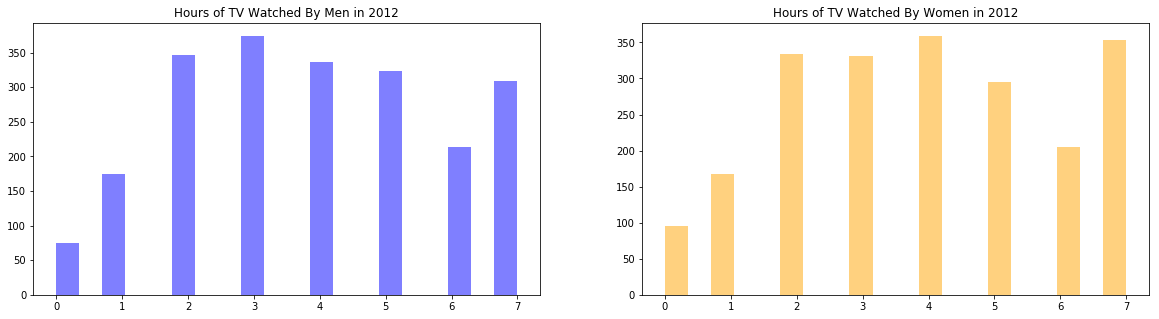

Mann-Whitney: MannwhitneyuResult(statistic=2271081.5, pvalue=0.22382598497660156)
Mood's Median: (0.10448797978115422, 0.7465089423999145, 4.0, array([[ 846,  853],
       [1305, 1287]]))
Kruskal-Wallis: KruskalResult(statistic=0.5766091020549451, pvalue=0.447644522500795)


In [5]:
yr_12_men_tv = df[df['year'] == 6][df['gndr'] == 1]['tvtot'].dropna()
yr_12_women_tv = df[df['year'] == 6][df['gndr'] == 2]['tvtot'].dropna()

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(yr_12_men_tv, bins=20, alpha=0.5, color='blue')
plt.title('Hours of TV Watched By Men in 2012')

plt.subplot(1, 2, 2)
plt.hist(yr_12_women_tv, bins=20, alpha=0.5, color='orange')
plt.title('Hours of TV Watched By Women in 2012')

plt.show()

print('Mann-Whitney:', mannwhitneyu(yr_12_men_tv, yr_12_women_tv))
print("Mood's Median:", median_test(yr_12_men_tv, yr_12_women_tv))
print('Kruskal-Wallis:', kruskal(yr_12_men_tv, yr_12_women_tv))

- __Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?__

    I used a T-test for independent groups for this comparison, as people living with a partner and those living alone are completely separate and do not overlap. It shows that people with partners believe in other people's fairness significantly more than those who are single.

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


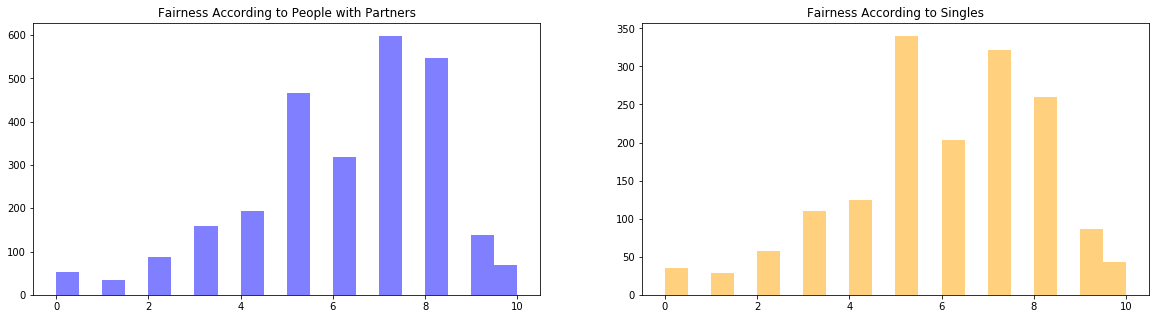

Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)

In [6]:
df_copy = df.copy()
null_fairs = df_copy[df_copy['pplfair'].isnull()]

yr_12_partners_fairness = df_copy[df_copy['partner'] == 1][df_copy['year'] == 6]['pplfair']
yr_12_alones_fairness = df_copy[df_copy['partner'] == 2][df_copy['year'] == 6]['pplfair']

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(yr_12_partners_fairness.dropna(), bins=20, alpha=0.5, color='blue')
plt.title('Fairness According to People with Partners')

plt.subplot(1, 2, 2)
plt.hist(yr_12_alones_fairness.dropna(), bins=20, alpha=0.5, color='orange')
plt.title('Fairness According to Singles')

plt.show()

ttest_ind(yr_12_partners_fairness, yr_12_alones_fairness, nan_policy='omit')

- __Pick 3 or 4 of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?__

    I used 2 non-parametric tests (Mood's Median, Kruskal-Wallis) for this problem, as I will be comparing 3+ countries whose citizens' answers are completely independent of each other, and whose social meeting numbers are not normally distributed. SE seems to be significantly different from both ES and NO – ES and NO do not differ significantly from each other.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


ES
   median: 6.0
   mean: 5.2601156069364166
NO
   median: 6.0
   mean: 5.3023255813953485
SE
   median: 6.0
   mean: 5.426211453744493


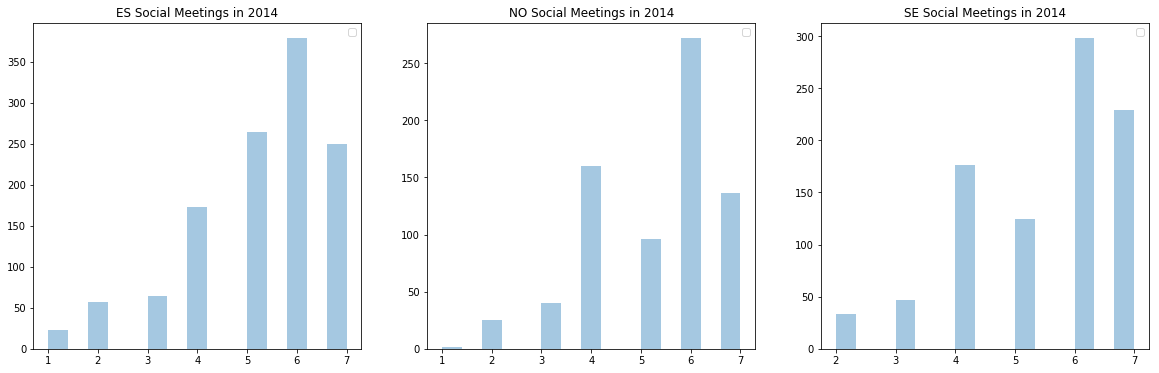

Mood's Median: (11.561242305930413, 0.0030867974392399964, 6.0, array([[250, 136, 229],
       [961, 595, 679]]))
Kruskal-Wallis: KruskalResult(statistic=6.904038519231737, pvalue=0.03168159837298754)


In [19]:
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['sclmeet'])

selected_countries = ['ES', 'NO', 'SE']
query_results = []

plt.figure(figsize=(20,6))

for idx, cntry in enumerate(selected_countries):
    yr_14_sclmeet = df_copy.query('year == 7 and cntry == "' + cntry + '"')['sclmeet']
    print(cntry)
    print('   median:', yr_14_sclmeet.median())
    print('   mean:', yr_14_sclmeet.mean())
    query_results.append(yr_14_sclmeet)
    
    plt.subplot(1, 3, idx + 1)
    plt.hist(yr_14_sclmeet.dropna(), bins=15, alpha=0.4)
    plt.legend()
    plt.title(cntry + ' Social Meetings in 2014')
    
#     plt.subplot(2, 3, 2 * idx + 2)
#     plt.boxplot(yr_14_sclmeet.dropna())
#     plt.legend()
#     plt.title(cntry + ' Social Meetings in 2014')
    
plt.show()

print("Mood's Median:", median_test(*query_results))
print('Kruskal-Wallis:', kruskal(*query_results))

In [21]:
def get_yr_14_sclmeet_for(cntry):
    return df_copy.query('year == 7 and cntry == "' + cntry + '"')['sclmeet']

for name, test in {'mann-whitney': mannwhitneyu, "mood's median": median_test, 'kruskal': kruskal}.items():
    for combo in [('ES', 'NO'), ('ES', 'SE'), ('NO', 'SE')]:
        print(name, '(', combo[0], 'vs.', combo[1], '):', test(get_yr_14_sclmeet_for(combo[0]), get_yr_14_sclmeet_for(combo[1])))

mann-whitney ( ES vs. NO ): MannwhitneyuResult(statistic=441874.5, pvalue=0.47443309960851965)
mann-whitney ( ES vs. SE ): MannwhitneyuResult(statistic=517268.0, pvalue=0.00818216038075548)
mann-whitney ( NO vs. SE ): MannwhitneyuResult(statistic=312204.5, pvalue=0.016380772865283215)
mood's median ( ES vs. NO ): (1.0659064492755896, 0.30187191598669527, 6.0, array([[250, 136],
       [961, 595]]))
mood's median ( ES vs. SE ): (5.952530127496002, 0.014696178117458505, 6.0, array([[250, 229],
       [961, 679]]))
mood's median ( NO vs. SE ): (9.860448283195055, 0.001688699530843686, 6.0, array([[136, 229],
       [595, 679]]))
kruskal ( ES vs. NO ): KruskalResult(statistic=0.004118258500640619, pvalue=0.9488319512783521)
kruskal ( ES vs. SE ): KruskalResult(statistic=5.763475949315309, pvalue=0.01636267063215786)
kruskal ( NO vs. SE ): KruskalResult(statistic=4.558428749475355, pvalue=0.032757112714878724)


- __Pick 3 or 4 of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?__

I used a one-way ANOVA test for this problem, as I will be comparing 3+ countries whose citizens' answers are completely independent of each other, and whose social activities numbers are roughly normally distributed. It shows a significant difference between the three countries' frequency of participating in social activities. 

For citizens aged 0-30 and 61+, ES social activity levels differed significant from both SE and NO – SE and NO did not differ significantly from each other.

For citizens aged 31-60, ES differs significantly from SE. All other combinations (ES and NO, SE and NO) showed insignificant difference.

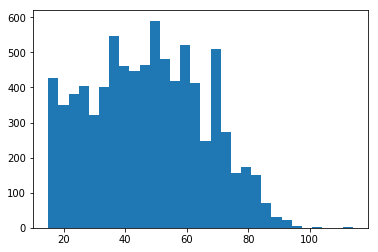

In [178]:
plt.hist(df_copy['agea'].dropna(), bins=30)
plt.show()

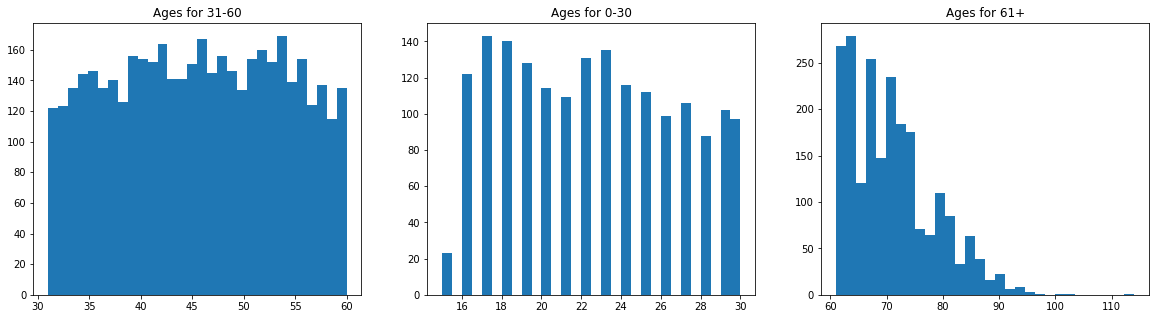

In [13]:
# age groups – do multiple ANOVA tests across countries per age group
df_copy = df.copy()
df_copy = df_copy.dropna(subset=['sclact'])

def get_age_group(x):
    if x <= 30:
        return '0-30'
    elif x <= 60:
        return '31-60'
    else:
        return '61+'

df_copy['age_grp'] = df_copy['agea'].apply(get_age_group)

plt.figure(figsize=(20,5))

for idx, age_grp in enumerate(df_copy['age_grp'].unique()):
    plt.subplot(1, 3, idx + 1)
    plt.hist(df_copy[df_copy['age_grp'] == age_grp]['agea'].dropna(), bins=30)
    plt.title('Ages for ' + age_grp)
plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


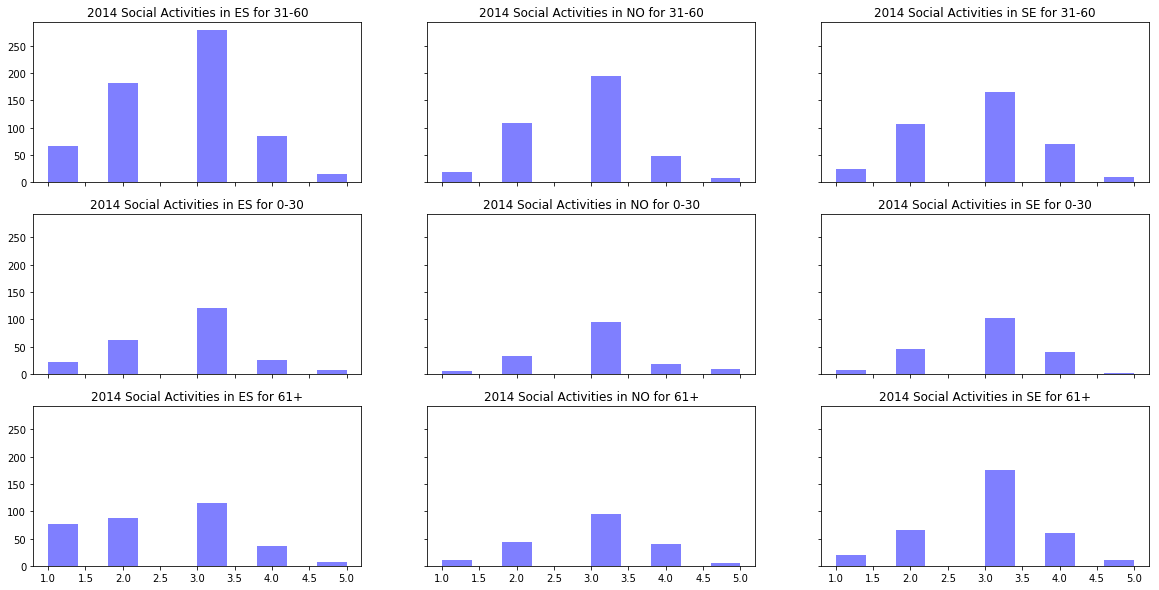

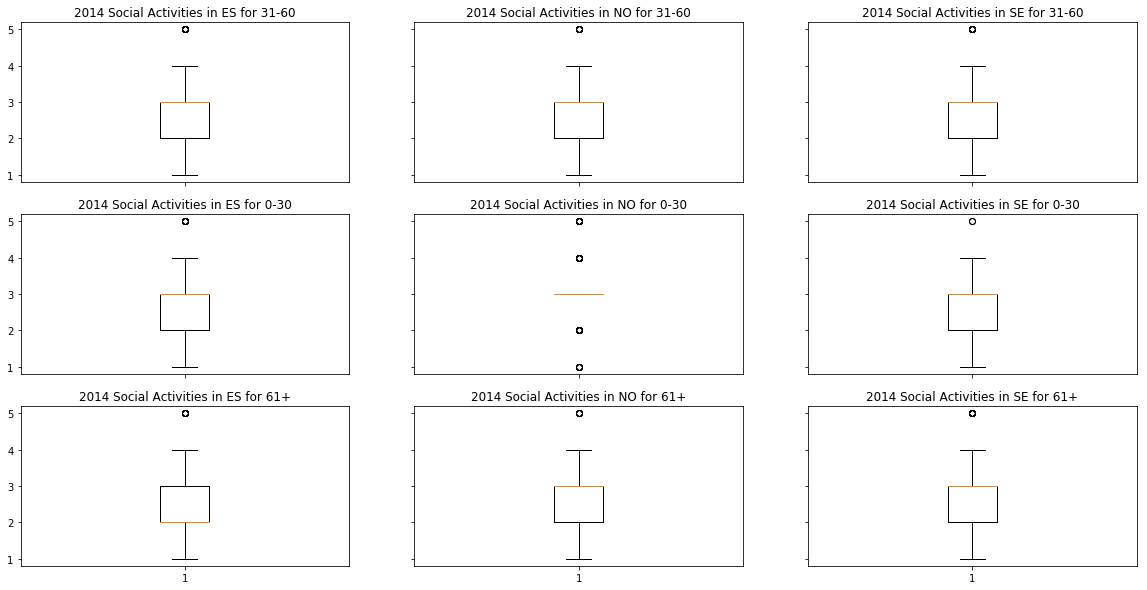

In [15]:
selected_countries = ['ES', 'NO', 'SE']
age_groups = df_copy['age_grp'].unique()
young_query_res = []
middle_query_res = []
old_query_res = []

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)

for idx, cntry in enumerate(selected_countries):
    for idx2, age_grp in enumerate(age_groups):
        yr_14_sclact = df_copy.query('year == 7 and cntry == "' + cntry + '" and age_grp == "' + age_grp + '"')['sclact']
        
        if age_grp == '0-30':
            young_query_res.append(yr_14_sclact)
        elif age_grp == '31-60':
            middle_query_res.append(yr_14_sclact)
        else:
            old_query_res.append(yr_14_sclact)
            
        curr_idx = 4 * idx + idx2

        axs[idx2][idx].hist(yr_14_sclact.dropna(), bins=10, alpha=0.5, color='blue', label=cntry)
        axs[idx2][idx].set_title('2014 Social Activities in ' + cntry + ' for ' + age_grp)

fig.show()

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.set_figwidth(20)
fig.set_figheight(10)

for idx, cntry in enumerate(selected_countries):
    for idx2, age_grp in enumerate(age_groups):
        yr_14_sclact = df_copy.query('year == 7 and cntry == "' + cntry + '" and age_grp == "' + age_grp + '"')['sclact']
        
        if age_grp == '0-30':
            young_query_res.append(yr_14_sclact)
        elif age_grp == '31-60':
            middle_query_res.append(yr_14_sclact)
        else:
            old_query_res.append(yr_14_sclact)

        axs[idx2][idx].boxplot(yr_14_sclact.dropna())
        axs[idx2][idx].set_title('2014 Social Activities in ' + cntry + ' for ' + age_grp)

fig.show()

In [181]:
print('0-30:', f_oneway(*young_query_res))
print('31-60:', f_oneway(*middle_query_res))
print('60+:', f_oneway(*old_query_res))

0-30: F_onewayResult(statistic=3.4234089664745357, pvalue=0.004468939757356427)
31-60: F_onewayResult(statistic=2.608921661738947, pvalue=0.02318453766317114)
60+: F_onewayResult(statistic=24.475477861624825, pvalue=7.354425732445787e-24)


In [182]:
def get_yr_14_sclact_for(cntry, age_grp):
    return df_copy.query('year == 7 and cntry == "' + cntry + '" and age_grp == "' + age_grp + '"')['sclact']

for idx, age_grp in enumerate(age_groups):
    print('For ' + age_grp + ':')
    print('   ES vs. NO:', ttest_ind(get_yr_14_sclact_for('ES', age_grp), get_yr_14_sclact_for('NO', age_grp)))
    print('   ES vs. SE:', ttest_ind(get_yr_14_sclact_for('ES', age_grp), get_yr_14_sclact_for('SE', age_grp)))
    print('   NO vs. SE:', ttest_ind(get_yr_14_sclact_for('NO', age_grp), get_yr_14_sclact_for('SE', age_grp)))

For 31-60:
   ES vs. NO: Ttest_indResult(statistic=-1.7202723778833635, pvalue=0.08569262397382144)
   ES vs. SE: Ttest_indResult(statistic=-2.3214680632454776, pvalue=0.02046221624068405)
   NO vs. SE: Ttest_indResult(statistic=-0.6405753750497851, pvalue=0.521995049879904)
For 0-30:
   ES vs. NO: Ttest_indResult(statistic=-2.596109118010922, pvalue=0.009779372899630384)
   ES vs. SE: Ttest_indResult(statistic=-2.2301891463450154, pvalue=0.026246703094438106)
   NO vs. SE: Ttest_indResult(statistic=0.5517107432369001, pvalue=0.5814897973943013)
For 61+:
   ES vs. NO: Ttest_indResult(statistic=-5.833272881282756, pvalue=9.611254354940555e-09)
   ES vs. SE: Ttest_indResult(statistic=-6.939313190683903, pvalue=9.52705289072373e-12)
   NO vs. SE: Ttest_indResult(statistic=0.031410014011702375, pvalue=0.97495453781386)
